In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:xlabel='MEDV'>

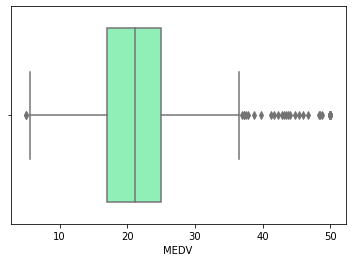

In [4]:
sns.boxplot(x='MEDV',data=boston_df,palette='rainbow')

# Provide a  histogram for the Charles river variable

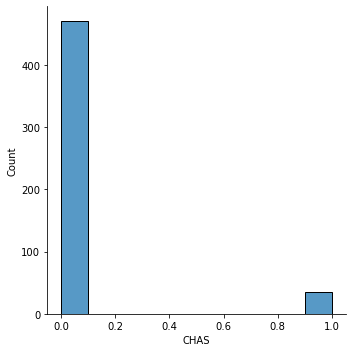

In [5]:
sns.displot(boston_df['CHAS'])

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [10]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']=='under 35'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']=='between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'age_group']=='Older 70'

1      True
7      True
8      True
9      True
10     True
       ... 
500    True
502    True
503    True
504    True
505    True
Name: age_group, Length: 287, dtype: bool

<AxesSubplot:xlabel='MEDV', ylabel='age_group'>

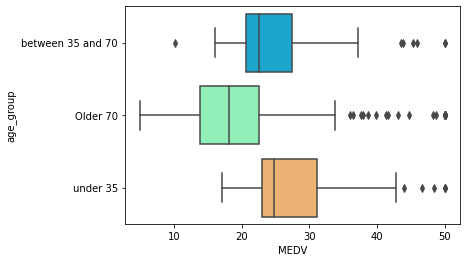

In [12]:
sns.boxplot(x='MEDV',y='age_group',data=boston_df,palette='rainbow')

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

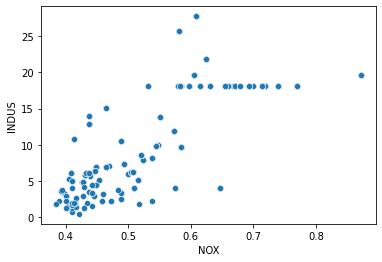

In [14]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
# More or less their relationship is linear and we can model it by regression 

# Create a histogram for the pupil to teacher ratio variable

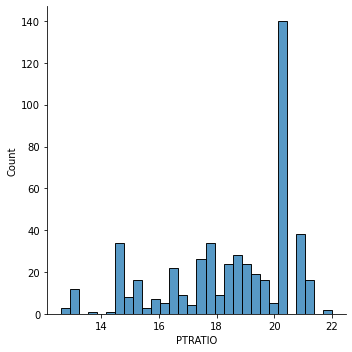

In [16]:
sns.displot(boston_df['PTRATIO'],bins=30)

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [17]:
import scipy.stats
scipy.stats.ttest_ind(boston_df['MEDV'],boston_df['CHAS'])
## pvalue<0.5 >> reject the null hypothesis >> there is consequential relationship between the MEDV and CHAS 

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [37]:
scipy.stats.f_oneway(boston_df['MEDV'],boston_df['AGE'])
## pvalue<0.5 >> reject the null hypothesis >> there is consequential relationship between the MEDV and AGE>82 

F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [35]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
## pvalue<0.5 >> reject the null hypothesis >> there is  relationship between the NOX and INDUS 

(0.763651446920915, 7.913361061239593e-98)

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

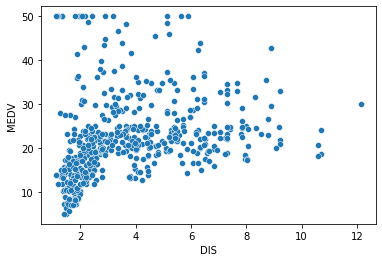

In [43]:
sns.scatterplot(x='DIS',y='MEDV',data=boston_df)

In [44]:
import statsmodels.api as sm
X=boston_df['DIS']
Y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
prediction=model.predict(X)
model.summary()
## Prob (F-statistic) <0.5 >> reject the null hypothesis >> there is  relationship between the DIS and MEDV 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.21e-08
Time:                        17:30:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""